In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression()

In [5]:
X = df[['highway-mpg']]
Y = df['price']

In [6]:
lm.fit(X,Y)

LinearRegression()

In [7]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
lm.intercept_

38423.3058581574

In [9]:
lm.coef_

array([-821.73337832])

In [10]:
#Question #1 a): 
#Create a linear regression object called "lm1".

# Write your code below and press Shift+Enter to execute 
lm1 = LinearRegression()

In [11]:
#Question #1 b): 
#Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [12]:
#Question #1 c):
#Find the slope and intercept of the model.



#Intercept¶
# Write your code below and press Shift+Enter to execute 
lm1.intercept_

array([-7963.33890628])

In [13]:
#Slope
# Write your code below and press Shift+Enter to execute 
lm1.coef_


array([[166.86001569]])

In [15]:
# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*'engine-size'

TypeError: can't multiply sequence by non-int of type 'float'

In [16]:
#Multiple Linear Regression
#What if we want to predict car price using more than one variable?

#If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

In [17]:
#Let's develop a model using these variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [22]:
lm.fit(Z, df[['price']])

LinearRegression()

In [23]:
lm.intercept_

array([-15806.62462633])

In [24]:
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [27]:
#Question #2 a): 
#Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".
# Write your code below and press Shift+Enter to execute 
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [28]:
lm2

LinearRegression()

In [29]:
lm2.coef_

array([   1.49789586, -820.45434016])

# 2. Model Evaluation Using Visualization

In [30]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48177.02387665142)

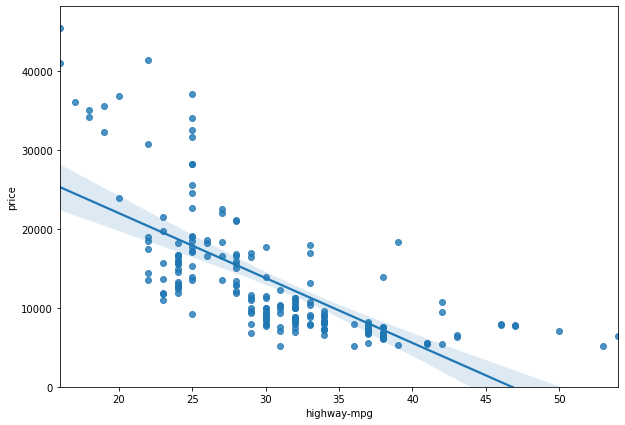

In [33]:
#Let's visualize highway-mpg as potential predictor variable of price:

width = 10
height = 7
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

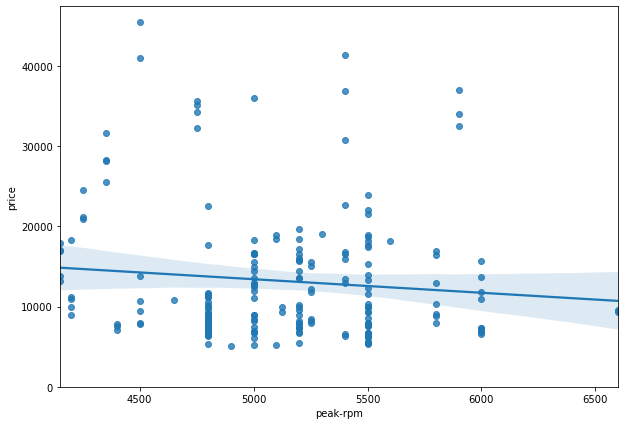

In [34]:
#Let's compare this plot to the regression plot of "peak-rpm".

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [35]:
#Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.
# Write your code below and press Shift+Enter to execute 
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


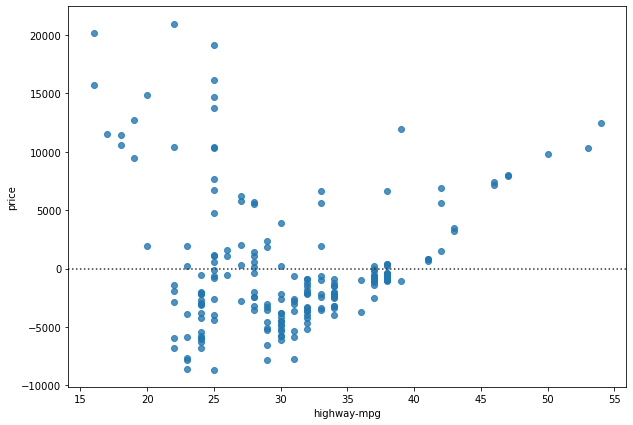

In [38]:
#residual Plot
width = 10
height = 7
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

# Multiple Linear Regression
# How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it #with regression or residual plot.

# One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted # values that result from the model and compare it to the distribution of the actual values.

In [39]:
Y_hat = lm.predict(Z)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


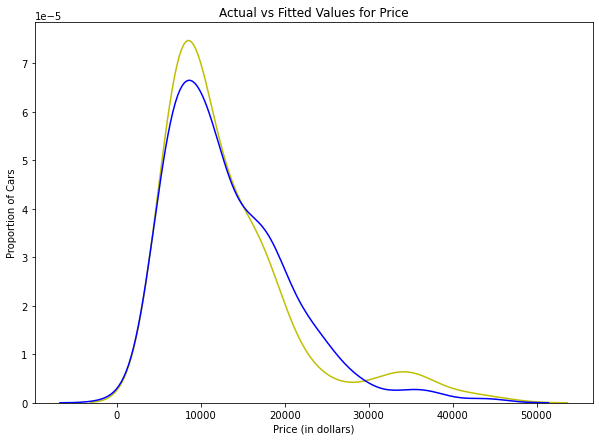

In [43]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# 3. Polynomial Regression and Pipelines
# Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

# We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

# There are different orders of polynomial regression:

# Quadratic - 2nd Order
# 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2
 
# Cubic - 3rd Order
# 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3
# Higher-Order:
# 𝑌=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3....

In [44]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [45]:
x = df['highway-mpg']
y = df['price']

In [46]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


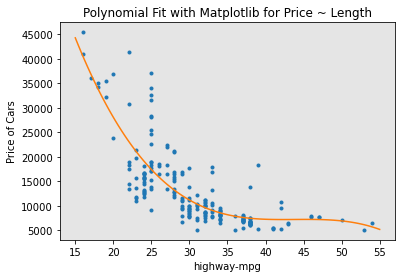

In [47]:
PlotPolly(p, x, y, 'highway-mpg')

In [48]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


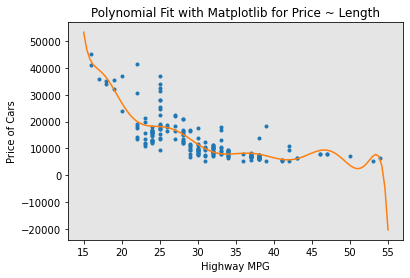

In [49]:
#Create 11 order polynomial model with the variables x and y from above.

# Write your code below and press Shift+Enter to execute 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [50]:
#We can perform a polynomial transform on multiple features. First, we import the module:

from sklearn.preprocessing import PolynomialFeatures

In [51]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [52]:
Z_pr=pr.fit_transform(Z)

In [53]:
Z.shape

(201, 4)

In [54]:
Z_pr.shape

(201, 15)

In [55]:
#Pipeline
#Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [57]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [58]:
#First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
Then, we can normalize the data, perform a transform and fit the model simultaneously.
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [59]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [60]:
#Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.
# Write your code below and press Shift+Enter to execute 
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# 4. Measures for In-Sample Evaluation

In [61]:
#Model 1: Simple Linear Regression
#Let's calculate the R^2:

#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
#We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

The R-square is:  0.4965911884339176


In [62]:
#Let's calculate the MSE:
#We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [63]:
#Let's import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

In [64]:
#We can compare the predicted results with the actual results:

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


# Model 2: Multiple Linear Regression

In [66]:
#Let's calculate the R^2:

# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))
#We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

The R-square is:  0.8093562806577457


In [67]:
#We produce a prediction:

Y_predict_multifit = lm.predict(Z)

In [68]:
#We compare the predicted results with the actual results:

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


# Model 3: Polynomial Fit

In [69]:
#Let's calculate the R^2.

#Let’s import the function r2_score from the module metrics as we are using a different function.

from sklearn.metrics import r2_score

In [71]:
#We apply the function to get the value of R^2:

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
#We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

The R-square value is:  0.6741946663906522


In [72]:
#MSE
#We can also calculate the MSE:

mean_squared_error(df['price'], p(x))

20474146.426361203

# 5. Prediction and Decision Making

In [73]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [74]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [75]:
lm.fit(X, Y)
lm

LinearRegression()

In [78]:
yhat=lm.predict(new_input)
yhat[0:5]

array([ 37601.57247984,  36779.83910151,  35958.10572319,  35136.37234487,
        34314.63896655,  33492.90558823,  32671.1722099 ,  31849.43883158,
        31027.70545326,  30205.97207494,  29384.23869662,  28562.50531829,
        27740.77193997,  26919.03856165,  26097.30518333,  25275.57180501,
        24453.83842668,  23632.10504836,  22810.37167004,  21988.63829172,
        21166.9049134 ,  20345.17153508,  19523.43815675,  18701.70477843,
        17879.97140011,  17058.23802179,  16236.50464347,  15414.77126514,
        14593.03788682,  13771.3045085 ,  12949.57113018,  12127.83775186,
        11306.10437353,  10484.37099521,   9662.63761689,   8840.90423857,
         8019.17086025,   7197.43748192,   6375.7041036 ,   5553.97072528,
         4732.23734696,   3910.50396864,   3088.77059031,   2267.03721199,
         1445.30383367,    623.57045535,   -198.16292297,  -1019.8963013 ,
        -1841.62967962,  -2663.36305794,  -3485.09643626,  -4306.82981458,
        -5128.5631929 ,  

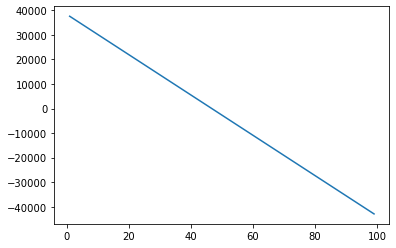

In [77]:
plt.plot(new_input, yhat)
plt.show()

# Decision Making: Determining a Good Model Fit
    Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

    What is a good R-squared value?
    When comparing models, the model with the higher R-squared value is a better fit for the data.

    What is a good MSE?
    When comparing models, the model with the smallest MSE value is a better fit for the data.

    Let's take a look at the values for the different models.
    Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

    R-squared: 0.49659118843391759
    MSE: 3.16 x10^7
    Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

    R-squared: 0.80896354913783497
    MSE: 1.2 x10^7
    Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

    R-squared: 0.6741946663906514
    MSE: 2.05 x 10^7
    Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
    Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

    In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

    MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
    R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
    This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

    Simple Linear Model (SLR) vs. Polynomial Fit
    MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
    R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
    Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

    Multiple Linear Regression (MLR) vs. Polynomial Fit
    MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
    R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.